## Name : Amruta Mulay , Github Username : Amruta131198 , USC ID : 6897885438

In [1]:
#Importing all necessary libraries required for HW-3
import os
import re
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import resample
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

COLUMN_NAMES = ["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
OG_COLUMN_NAMES = ["# Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
STATS = ['Mean', 'STD', 'Min', '1st_quartile', 'Median', '3rd_quartile', 'Max']
ORDERED_STATS = ['Min', 'Max', 'Mean', 'Median', 'STD', '1st_quartile', '3rd_quartile']

### Time Series Classification Part 1: Feature Creation/Extraction

### 1. (a) Download the AReM Dataset

In [2]:
ROOT = '../data/'
sniffer = csv.Sniffer()

### 1. (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data

In [4]:
#Reference: os.walk(): https://www.tutorialspoint.com/python/os_walk.htm

# os.path.split() method in Python is used to Split the path name into a pair head[0] and tail[1].
#Here, tail is the last path name component and head is everything leading up to that.
# os.path.splitext() is used to split the path name into a pair root and extension.

# function to traverse data folder and split file paths in to train group and test group
def split_train_test(root):
    train_set = []
    test_set = []
    for root, _, file in os.walk(root):
        for f in file:
            if (os.path.splitext(f)[1] == ".csv"):
                # find digits (database1.csv, database2.csv , ...)
                csv_idx = int(re.findall("\d+", f)[0])
                file_path = os.path.join(root, f)
                activity = os.path.split(root)[-1]
                if (csv_idx <= 2 or (activity not in ["bending1", "bending2"] and csv_idx == 3)):
                    test_set.append(file_path)
                else:
                    train_set.append(file_path)
    return train_set, test_set

In [5]:
# Splitting data in test set and training set
train, test = split_train_test(ROOT)

In [6]:
train

['../data/bending1/dataset7.csv',
 '../data/bending1/dataset6.csv',
 '../data/bending1/dataset4.csv',
 '../data/bending1/dataset5.csv',
 '../data/bending1/dataset3.csv',
 '../data/walking/dataset7.csv',
 '../data/walking/dataset6.csv',
 '../data/walking/dataset4.csv',
 '../data/walking/dataset5.csv',
 '../data/walking/dataset10.csv',
 '../data/walking/dataset11.csv',
 '../data/walking/dataset13.csv',
 '../data/walking/dataset12.csv',
 '../data/walking/dataset15.csv',
 '../data/walking/dataset14.csv',
 '../data/walking/dataset8.csv',
 '../data/walking/dataset9.csv',
 '../data/bending2/dataset6.csv',
 '../data/bending2/dataset4.csv',
 '../data/bending2/dataset5.csv',
 '../data/bending2/dataset3.csv',
 '../data/standing/dataset7.csv',
 '../data/standing/dataset6.csv',
 '../data/standing/dataset4.csv',
 '../data/standing/dataset5.csv',
 '../data/standing/dataset10.csv',
 '../data/standing/dataset11.csv',
 '../data/standing/dataset13.csv',
 '../data/standing/dataset12.csv',
 '../data/standi

In [7]:
test

['../data/bending1/dataset1.csv',
 '../data/bending1/dataset2.csv',
 '../data/walking/dataset1.csv',
 '../data/walking/dataset2.csv',
 '../data/walking/dataset3.csv',
 '../data/bending2/dataset1.csv',
 '../data/bending2/dataset2.csv',
 '../data/standing/dataset1.csv',
 '../data/standing/dataset2.csv',
 '../data/standing/dataset3.csv',
 '../data/sitting/dataset1.csv',
 '../data/sitting/dataset2.csv',
 '../data/sitting/dataset3.csv',
 '../data/lying/dataset1.csv',
 '../data/lying/dataset2.csv',
 '../data/lying/dataset3.csv',
 '../data/cycling/dataset1.csv',
 '../data/cycling/dataset2.csv',
 '../data/cycling/dataset3.csv']

In [11]:
entire_dataset = train + test
entire_dataset

['../data/bending1/dataset7.csv',
 '../data/bending1/dataset6.csv',
 '../data/bending1/dataset4.csv',
 '../data/bending1/dataset5.csv',
 '../data/bending1/dataset3.csv',
 '../data/walking/dataset7.csv',
 '../data/walking/dataset6.csv',
 '../data/walking/dataset4.csv',
 '../data/walking/dataset5.csv',
 '../data/walking/dataset10.csv',
 '../data/walking/dataset11.csv',
 '../data/walking/dataset13.csv',
 '../data/walking/dataset12.csv',
 '../data/walking/dataset15.csv',
 '../data/walking/dataset14.csv',
 '../data/walking/dataset8.csv',
 '../data/walking/dataset9.csv',
 '../data/bending2/dataset6.csv',
 '../data/bending2/dataset4.csv',
 '../data/bending2/dataset5.csv',
 '../data/bending2/dataset3.csv',
 '../data/standing/dataset7.csv',
 '../data/standing/dataset6.csv',
 '../data/standing/dataset4.csv',
 '../data/standing/dataset5.csv',
 '../data/standing/dataset10.csv',
 '../data/standing/dataset11.csv',
 '../data/standing/dataset13.csv',
 '../data/standing/dataset12.csv',
 '../data/standi

### 1.(c) Feature Extraction

### 1.(c-i) Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

> ANSWER:
>##### Time series classification involves analyzing and classifying sequences of data points over time. To do this, various time-domain features are commonly used to extract meaningful information from the time series data. These features capture different aspects of the data's distribution and behavior. Here are some of the commonly used time-domain features in time series classification:

>- Mean: The average value of the data points in the time series.

>- Median: The middle value of the data points when they are sorted in ascending order. It is less sensitive to outliers compared to the mean.

>- Variance: A measure of the spread or dispersion of the data points from the mean. Higher variance indicates greater variability.

>- Standard Deviation: The square root of the variance, which quantifies the degree of variation or deviation from the mean.

>- Skewness: A measure of the asymmetry of the data distribution. Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution.

>- Kurtosis: A measure of the "tailedness" of the data distribution. It quantifies the heaviness of the tails relative to a normal distribution.

>- Minimum: The smallest value in the time series.

>- Maximum: The largest value in the time series.

>- Range: The difference between the maximum and minimum values in the time series.

>- Percentiles: Specific data points that divide the data into equal or specified proportions. Common percentiles include the 25th (Q1), 50th (Q2 or median), and 75th (Q3) percentiles.

>- Interquartile Range (IQR): The range between the 25th and 75th percentiles. It is a measure of the spread of the middle 50% of the data.

>- Root Mean Square (RMS): The square root of the mean of the squared values of data points. It measures the magnitude of the data.

>- Entropy: A measure of the disorder or randomness in the time series. It quantifies the uncertainty of the data distribution.

>- Mean Absolute Deviation (MAD): The average of the absolute deviations of data points from the mean.

>- Root Mean Square Deviation (RMSD): A measure of the average deviation of data points from a baseline or reference.

>- Time-domain Statistical Moments: Higher-order statistical moments such as third (skewness) and fourth (kurtosis) moments can also be used to capture distribution characteristics.

>- Temporal Features: Features related to the time, such as time of day, day of the week, or month, if applicable.

>- Signal Energy: A measure of the energy content in the time series.

>###### These time-domain features can be calculated for specific segments or windows of the time series data, and they provide valuable information for building classifiers and making predictions in time series classification tasks. The choice of which features to use often depends on the specific characteristics of the data and the problem at hand.

### 1.(c-ii) Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [12]:
def load_data_from_csv(files, feature, cols, segs=1, standard=False):
    collect_all_instances  = []
    labels = []
    for f in files:
        labels.append(get_label(f)) # Keeps track of the data row associated with which kind of activity
        separator = get_separator(f)
        
        if separator == ",": #Skipping the first 5 rows since they do not contain any data in the csv file
            fc = pd.read_csv(f, skiprows=5, header=None, on_bad_lines='skip')
        elif separator == "\\s+":
            fc = pd.read_csv(f, skiprows=5, sep="\\s+", header=None, on_bad_lines='skip')
        else:
            fc = pd.read_csv(f, skiprows=5, sep="\\s+", header=None, on_bad_lines='skip')
            
        fc.columns = OG_COLUMN_NAMES
        
        # breaking time series into equal lengths
        seg_length = int(fc.shape[0] / segs)
        description = []
        
        cur_seg = fc[0 : min(seg_length, fc.shape[0])]
        time_col = "# Columns: time"
        time_series_describe = cur_seg.describe().drop('count').drop(columns=time_col).T
        #description keeps track of the time-domain features of the current instance being processed
        description.append(time_series_describe.values.flatten())
        #instances list keeps track of the time-domain features of all the instances so far collected
        collect_all_instances.append(np.concatenate(description))
        
    # reordering
    time_domain_feature_df = pd.DataFrame(collect_all_instances)
    time_domain_feature_df.columns = get_columns()
    time_domain_feature_df = time_domain_feature_df.loc[:, feature]
    
    # label addition
    time_domain_feature_df['Activity'] = pd.Series(labels)
    
    return time_domain_feature_df

def get_actual_ordered_cols():
    feature = []
    for i in range(1, 7):
        for stat in ORDERED_STATS:
            feature.append(f'{stat}{i}')
    return feature

def get_label(file):
    parent_directory = os.path.dirname(file)
    filename_components = parent_directory.split("/")
    return filename_components[-1]

def get_separator(file):
    f = open(file)
    return sniffer.sniff(f.read()).delimiter

def get_columns():
    feature = []
    for i in range(1, 7):
        for stat in STATS:
            feature.append(f'{stat}{i}')
    return feature

In [13]:
feature = get_actual_ordered_cols()

train_data = load_data_from_csv(train, feature, OG_COLUMN_NAMES)
test_data = load_data_from_csv(test, feature, OG_COLUMN_NAMES)
entire_data = load_data_from_csv(entire_dataset, feature, OG_COLUMN_NAMES)

In [14]:
entire_data

,Min1,Max1,Mean1,Median1,STD1,1st_quartile1,3rd_quartile1,Min2,Max2,Mean2,...,1st_quartile5,3rd_quartile5,Min6,Max6,Mean6,Median6,STD6,1st_quartile6,3rd_quartile6,Activity
0,36.25,48.00,43.969125,44.500,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,20.5000,23.7500,0.0,2.96,0.555312,0.49,0.487826,0.0000,0.83,bending1
1,37.00,48.00,43.454958,43.250,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,22.2500,24.0000,0.0,5.26,0.679646,0.50,0.622534,0.4300,0.87,bending1
2,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,30.4575,36.3300,0.0,2.18,0.613521,0.50,0.524317,0.0000,1.00,bending1
3,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.2500,0.0,1.79,0.383292,0.43,0.389164,0.0000,0.50,bending1
4,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,35.3625,36.5000,0.0,1.79,0.493292,0.43,0.513506,0.0000,0.94,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,24.75,48.33,44.182937,48.000,7.495615,48.00,48.0000,0.0,3.11,0.101875,...,2.0000,5.5425,0.0,3.91,0.692771,0.50,0.675781,0.3225,0.94,lying
84,48.00,48.25,48.004167,48.000,0.032038,48.00,48.0000,0.0,0.43,0.007167,...,4.6700,10.0000,0.0,2.50,0.641229,0.50,0.388372,0.4600,0.83,lying
85,24.25,45.00,37.177042,36.250,3.581301,34.50,40.2500,0.0,8.58,2.374208,...,17.9500,21.7500,0.0,9.34,2.921729,2.50,1.852600,1.5000,3.90,cycling
86,28.75,44.75,37.561187,36.875,3.226507,35.25,40.2500,0.0,9.91,2.080687,...,18.0000,21.5000,0.0,9.62,2.765896,2.45,1.769203,1.4100,3.77,cycling


In [9]:
train_data

,Min1,Max1,Mean1,Median1,STD1,1st_quartile1,3rd_quartile1,Min2,Max2,Mean2,...,1st_quartile5,3rd_quartile5,Min6,Max6,Mean6,Median6,STD6,1st_quartile6,3rd_quartile6,Activity
0,36.25,48.00,43.969125,44.50,1.618364,43.310,44.67,0.0,1.50,0.413125,...,20.5000,23.7500,0.0,2.96,0.555312,0.490,0.487826,0.0000,0.830,bending1
1,37.00,48.00,43.454958,43.25,1.386098,42.500,45.00,0.0,1.58,0.378083,...,22.2500,24.0000,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.870,bending1
2,33.00,47.75,42.179812,43.50,3.670666,39.150,45.00,0.0,3.00,0.696042,...,30.4575,36.3300,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.000,bending1
3,33.00,45.75,41.678063,41.75,2.243490,41.330,42.75,0.0,2.83,0.535979,...,28.4575,31.2500,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.500,bending1
4,35.00,47.40,43.954500,44.33,1.558835,43.000,45.00,0.0,1.70,0.426250,...,35.3625,36.5000,0.0,1.79,0.493292,0.430,0.513506,0.0000,0.940,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,18.50,44.25,35.752354,36.00,4.614802,33.000,39.33,0.0,12.60,3.328104,...,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.060,cycling
65,24.25,45.00,37.177042,36.25,3.581301,34.500,40.25,0.0,8.58,2.374208,...,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.900,cycling
66,23.33,43.50,36.248768,36.75,3.824632,33.415,39.25,0.0,9.71,2.737307,...,15.7500,21.0000,0.0,11.15,3.532463,3.110,1.965267,2.1700,4.625,cycling
67,26.25,44.25,36.957458,36.29,3.434863,34.500,40.25,0.0,8.64,2.420083,...,14.0000,18.2500,0.0,8.34,2.934625,2.525,1.631380,1.6600,4.030,cycling


In [10]:
test_data

,Min1,Max1,Mean1,Median1,STD1,1st_quartile1,3rd_quartile1,Min2,Max2,Mean2,...,1st_quartile5,3rd_quartile5,Min6,Max6,Mean6,Median6,STD6,1st_quartile6,3rd_quartile6,Activity
0,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.300,bending1
1,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372437,...,32.0000,34.5000,0.0,3.11,0.571083,0.430,0.601010,0.0000,1.300,bending1
2,19.33,43.50,34.227771,35.500,4.889576,30.5000,37.7500,0.0,14.50,3.995729,...,14.7500,18.6700,0.0,9.74,3.394125,3.100,1.792090,2.1050,4.425,walking
3,12.50,45.00,33.509729,34.125,4.850923,30.5000,36.7500,0.0,13.05,4.450771,...,14.6275,18.7500,0.0,8.96,3.378479,3.085,1.787360,2.0600,4.440,walking
4,15.00,46.75,34.660583,35.000,5.315110,31.0000,38.2500,0.0,13.44,4.200896,...,14.2500,18.5000,0.0,8.99,3.244396,3.000,1.630983,2.1200,4.240,walking
5,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,20.5000,27.0000,0.0,4.97,0.700188,0.500,0.693720,0.4300,0.870,bending2
6,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,15.0000,20.7500,0.0,6.76,1.122125,0.830,1.012342,0.4700,1.300,bending2
7,33.33,48.00,44.334729,45.000,2.476940,42.2500,46.5000,0.0,3.90,0.432958,...,9.3300,17.7500,0.0,5.02,0.933000,0.830,0.673609,0.4700,1.250,standing
8,35.50,46.25,43.174938,43.670,1.989052,42.5000,44.5000,0.0,2.12,0.506583,...,12.7500,16.5000,0.0,5.72,0.911979,0.830,0.666161,0.4700,1.220,standing
9,32.75,47.00,42.760562,44.500,3.398919,41.3300,45.3725,0.0,3.34,0.486167,...,13.0000,18.5650,0.0,5.73,0.842271,0.710,0.722165,0.4300,1.090,standing


### 1.(c-iii.) Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [15]:
entire_data.describe().loc['std']

Min1             9.569975
Max1             4.394362
Mean1            5.335700
Median1          5.440054
STD1             1.772185
1st_quartile1    6.153874
3rd_quartile1    5.138925
Min2             0.000000
Max2             5.062729
Mean2            1.574198
Median2          1.412293
STD2             0.884137
1st_quartile2    0.946386
3rd_quartile2    2.125399
Min3             2.956462
Max3             4.875137
Mean3            4.008228
Median3          4.036396
STD3             0.946670
1st_quartile3    4.220658
3rd_quartile3    4.171628
Min4             0.000000
Max4             2.183625
Mean4            1.166178
Median4          1.145985
STD4             0.458283
1st_quartile4    0.843405
3rd_quartile4    1.552504
Min5             6.124001
Max5             5.741238
Mean5            5.675543
Median5          5.813782
STD5             1.024918
1st_quartile5    6.096465
3rd_quartile5    5.531720
Min6             0.045838
Max6             2.518921
Mean6            1.154889
Median6     

In [11]:
train_data.describe().loc['std']

Min1             8.794295
Max1             4.429182
Mean1            4.917692
Median1          4.956111
STD1             1.758670
1st_quartile1    5.731647
3rd_quartile1    4.783645
Min2             0.000000
Max2             5.147841
Mean2            1.600701
Median2          1.436960
STD2             0.902808
1st_quartile2    0.952201
3rd_quartile2    2.158416
Min3             3.053869
Max3             4.759853
Mean3            3.863097
Median3          3.845730
STD3             0.995959
1st_quartile3    4.145255
3rd_quartile3    3.946023
Min4             0.000000
Max4             2.302408
Mean4            1.179861
Median4          1.150092
STD4             0.473576
1st_quartile4    0.842501
3rd_quartile4    1.566564
Min5             5.368786
Max5             5.449726
Mean5            5.120426
Median5          5.267414
STD5             1.057998
1st_quartile5    5.543882
3rd_quartile5    4.957231
Min6             0.051766
Max6             2.540166
Mean6            1.171401
Median6     

In [12]:
test_data.describe().loc['std']

Min1             12.136206
Max1              4.379342
Mean1             6.790086
Median1           7.088085
STD1              1.869285
1st_quartile1     7.673052
3rd_quartile1     6.385720
Min2              0.000000
Max2              4.870395
Mean2             1.500529
Median2           1.345903
STD2              0.832472
1st_quartile2     0.941307
3rd_quartile2     2.028482
Min3              2.644618
Max3              5.393220
Mean3             4.588252
Median3           4.753522
STD3              0.760779
1st_quartile3     4.554121
3rd_quartile3     5.014339
Min4              0.000000
Max4              1.733937
Mean4             1.146338
Median4           1.161705
STD4              0.409008
1st_quartile4     0.867088
3rd_quartile4     1.541943
Min5              8.252947
Max5              6.782153
Mean5             7.366781
Median5           7.438749
STD5              0.919274
1st_quartile5     7.823870
3rd_quartile5     7.259433
Min6              0.000000
Max6              2.505306
M

In [27]:
def bootstrap(time_domain_features):
    # list to keep all 1000 resample results
    resampled_results = []
    for sample_number in range(1000):
        resampled_data = resample(time_domain_features)
        temp = resampled_data.apply(lambda col: np.std(col))
        resampled_results.append(temp)

    # converting list to dataframe and get 5%-95% percentile
    resampled_results = pd.DataFrame(resampled_results, columns=list(time_domain_features.columns))
    bootstrap_interval = resampled_results.apply(lambda col : (np.percentile(col, 5), np.percentile(col, 95)), axis=0)
    bootstrap_interval.apply(np.around, args=(2,))
    bootstrap_interval = bootstrap_interval.T
    bootstrap_interval.columns = ['low', 'high']
    return bootstrap_interval

In [29]:
bootstrap(entire_data.iloc[:, :-1])

,low,high
Min1,8.315770,10.707799
Max1,3.312019,5.307753
Mean1,4.687459,5.883132
Median1,4.768476,5.986823
STD1,1.553848,1.946687
1st_quartile1,5.540211,6.623785
3rd_quartile1,4.319746,5.821229
Min2,0.000000,0.000000
Max2,4.623080,5.380762
Mean2,1.398366,1.699940


In [28]:
bootstrap(train_data.iloc[:, :-1])

,low,high
Min1,7.496500,10.062759
Max1,3.251410,5.387876
Mean1,4.322625,5.426273
Median1,4.264840,5.474228
STD1,1.554004,1.938317
1st_quartile1,5.131572,6.178909
3rd_quartile1,3.911650,5.548534
Min2,0.000000,0.000000
Max2,4.646016,5.486531
Mean2,1.404762,1.717785


In [30]:
bootstrap(test_data.iloc[:, :-1])

,low,high
Min1,8.449954,14.416982
Max1,1.774411,6.207121
Mean1,4.807719,7.727827
Median1,5.093792,8.081632
STD1,1.263047,2.221969
1st_quartile1,5.798844,8.514730
3rd_quartile1,4.226951,7.460803
Min2,0.000000,0.000000
Max2,3.565024,5.382071
Mean2,0.991410,1.746595


### 1.(c-iv.) Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

In [33]:
entire_data_bending = pd.DataFrame(entire_data)
entire_data_bending.loc[entire_data_bending['Activity'].isin(['bending1', 'bending2']), 'Activity'] = 1
entire_data_bending.loc[entire_data_bending['Activity'] != 1, 'Activity'] = 0
entire_data_bending

,Min1,Max1,Mean1,Median1,STD1,1st_quartile1,3rd_quartile1,Min2,Max2,Mean2,...,1st_quartile5,3rd_quartile5,Min6,Max6,Mean6,Median6,STD6,1st_quartile6,3rd_quartile6,Activity
0,36.25,48.00,43.969125,44.500,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,20.5000,23.7500,0.0,2.96,0.555312,0.49,0.487826,0.0000,0.83,1
1,37.00,48.00,43.454958,43.250,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,22.2500,24.0000,0.0,5.26,0.679646,0.50,0.622534,0.4300,0.87,1
2,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,30.4575,36.3300,0.0,2.18,0.613521,0.50,0.524317,0.0000,1.00,1
3,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.2500,0.0,1.79,0.383292,0.43,0.389164,0.0000,0.50,1
4,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,35.3625,36.5000,0.0,1.79,0.493292,0.43,0.513506,0.0000,0.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,24.75,48.33,44.182937,48.000,7.495615,48.00,48.0000,0.0,3.11,0.101875,...,2.0000,5.5425,0.0,3.91,0.692771,0.50,0.675781,0.3225,0.94,0
84,48.00,48.25,48.004167,48.000,0.032038,48.00,48.0000,0.0,0.43,0.007167,...,4.6700,10.0000,0.0,2.50,0.641229,0.50,0.388372,0.4600,0.83,0
85,24.25,45.00,37.177042,36.250,3.581301,34.50,40.2500,0.0,8.58,2.374208,...,17.9500,21.7500,0.0,9.34,2.921729,2.50,1.852600,1.5000,3.90,0
86,28.75,44.75,37.561187,36.875,3.226507,35.25,40.2500,0.0,9.91,2.080687,...,18.0000,21.5000,0.0,9.62,2.765896,2.45,1.769203,1.4100,3.77,0


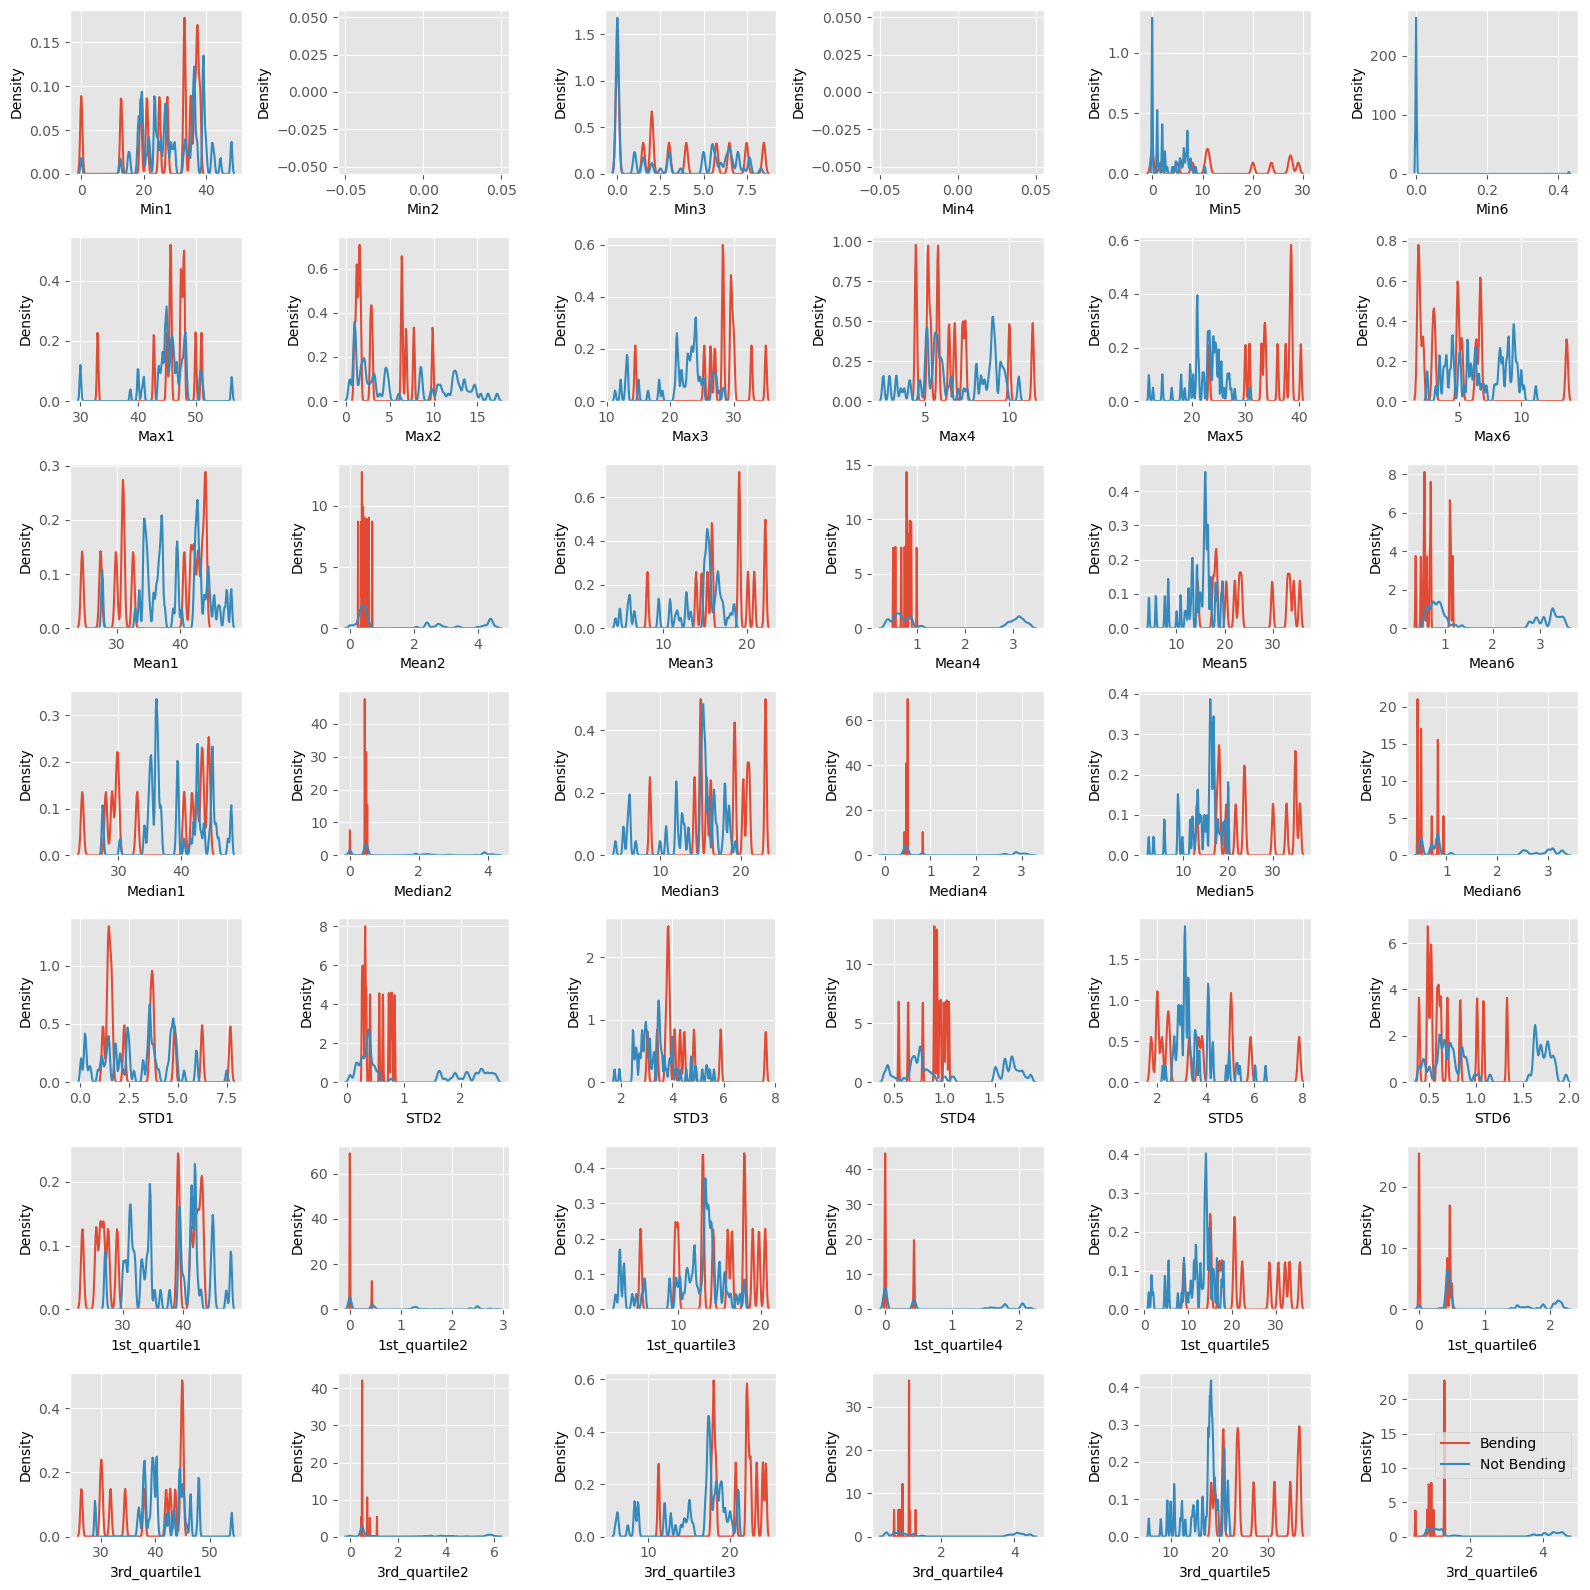

In [34]:
#7 Time-Domain Features and 6 time series
fig, axes = plt.subplots(7, 6, figsize=(16, 16))
for i in range(1, 7):
    for j, f in enumerate(ORDERED_STATS):
        sns.distplot(entire_data_bending.loc[entire_data_bending['Activity'] == 1, f + str(i)], 
                     kde = True, 
                     hist = False,
                     ax = axes[j, i-1],
                     label='Bending',
                     kde_kws={'bw':0.03}
                     )
        sns.distplot(entire_data_bending.loc[entire_data_bending['Activity'] == 0, f + str(i)], 
                     kde = True, 
                     hist = False,
                     ax = axes[j, i-1],
                     label='Not Bending',
                     kde_kws={'bw':0.03}
                    )
plt.tight_layout()
plt.legend()
plt.show()

Here we are using a binary case (i.e. bending/non-bending classification) here for a easier illustration of the judgement of time-domain features:

- Smaller overlap between two distributions of bending and non-bending curves is desired. This will allow a more clear and obvious decision boundary.
- High density distribution and a wider distribution signifies one class showing a representitive value.

Therefore, based on the principle to **relatively clear separated distributions**, we can conclude the top 3 as -->
- Max
- Mean
- 3rd Quartile

### 2. ISLR 3.7.4

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.

(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

> **Answer** : The extra polynomial terms allow for a closer fit (more degrees of freedom) of the training data, so I would expect the training RSS for cubic regression to be lower than for simple linear regression.

(b) Answer (a) using test rather than training RSS.

> **Answer** : The RSS of the cubic model will be larger because of overfitting. A simple linear regression would generalize better to unseen data, therefore it is expected to have lower test RSS. The cubic model is likely to overfit the training data, so it is expect to have a higher test RSS.

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

> **Answer** : The fundamental principle does not change. Polynomial regression has lower train RSS than the linear fit because of higher flexibility. No matter what the underlying true relationship is, the more flexible the model will be, lesser is the train RSS.

(d) Answer (c) using test rather than training RSS.

> **Answer** : The test RSS depends on how far from linear the true relationship of $f(x)$ is. If $f(x)$ is more linear than cubic, then cubic regression can overfit, so cubic RSS will be higher and linear RSS will be lower. If $f(x)$ is more cubic than linear, then linear regression can underfit, so linear RSS will be higher and cubic RSS will be lower. There is not enough information to tell which test RSS would be lower for either regression given the problem statement is defined as not knowing "how far it is from linear". 